# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Restful APIs & HTTP Requests </b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) What are APIs <br>
  &nbsp;&nbsp;&nbsp;&nbsp; b) What does HTTP stand for, request methods, status codes <br>
 &nbsp;&nbsp;&nbsp;&nbsp; c) Making API requests and retrieving/jsonifying data <br>
 &nbsp;&nbsp;&nbsp;&nbsp; d) Using APIs requests within functions & classes <br>
 2) <b>Working with the Pokemon API </b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) Making Requests to the Pokemon API<br>
  &nbsp;&nbsp;&nbsp;&nbsp; b) Creating a function to make API Requests <br>
 &nbsp;&nbsp;&nbsp;&nbsp; c) Creating a Pokemon class and instantiating Pokemon objects<br>
 &nbsp;&nbsp;&nbsp;&nbsp; d) Create an Evolver class that inherits from Pokemon class <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [ ]:
# making an API call
import requests
r = requests.get('https://pokeapi.co/api/v2/pokemon/charmander')
print(r)

print(r.status_code)
if r.status_code== 200:
    data = r.json()
print(data.keys())



In [ ]:
pip install requests

### Display a Pokemon's name, weight, abilities, and types

In [ ]:
#grabbing name 
name = data["name"]
print(name)# can add .title() since it's a string to capitalize the C. 


In [ ]:
#grabbing our list of types. 
types = [type_['type']['name'] for type_ in data ['types']]
print(types)

In [ ]:
types =[]
for type_ in data['types']:
    types.append(type_['type']['name'])
print(types)

In [ ]:
#weight
weight = data["weight"]
print(weight)

In [ ]:
#abilites
abilities = [pokebility['ability']['name'] for pokebility in data['abilities']]
print(abilities)

#### Create a function to Pull in your own Pokemon's data 

In [ ]:
import requests
def poke_api_call(pokemon):
    req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}") #could use .lower() after pokemon but within the {}
    if req.status_code == 200:
        data = req.json()

        name = data["name"]
        types = [type_['type']['name'] for type_ in data ['types']]
        abilities = [pokebility['ability']['name'] for pokebility in data['abilities']]
        weight = data['weight']

        poke = {  #dictionary
            "name": name,
            "types": types,
            "abilities": abilities,
            "weight": weight
            
        }
        return poke
    else:
        print("failed")
poke_api_call("squirtle")


Choose your pokemon

#### Use your function to create a dictionary of your favorite 6 pokemon

In [ ]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
party = ['heracross', 'vaporeon', 'flygon', 'charizard', 'pidgeot', 'crobat']

my_six_pokemon = {}
for pokemon in party:
    poke_stats = poke_api_call(pokemon)
    my_six_pokemon[poke_stats['name'].title()] = poke_stats

print(my_six_pokemon)

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [8]:
import requests
class Pokemon():         #argument
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.poke_api_call()
#       add poke_api_call to init
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            data = r.json()
        else:
            print(f"Please check the spelling of your pokemon and try again: {r.status_code}")
        self.name = data['name']
        self.types = [type_['type']['name'] for type_ in data['types']]
        self.abilities = [pokebility['ability']['name'] for pokebility in data ['abilities']]
        self.weight = data['weight']
        print(f"{self.name}'s data has been updated")

    def __repr__(self):
        return f"You caught a {self.name}!"
    
        

In [9]:
scyther = Pokemon("scyther")

scyther's data has been updated


In [10]:
party = ['heracross', 'vaporeon', 'flygon', 'charizard', 'pidgeot', 'crobat']
pokedex = {}

for name in party:
    new = Pokemon(name)
    pokedex[new.name.title()] = new.__dict__

print(pokedex)

heracross's data has been updated
vaporeon's data has been updated
flygon's data has been updated
charizard's data has been updated
pidgeot's data has been updated
crobat's data has been updated
{'Heracross': {'name': 'heracross', 'types': ['bug', 'fighting'], 'abilities': ['swarm', 'guts', 'moxie'], 'weight': 540}, 'Vaporeon': {'name': 'vaporeon', 'types': ['water'], 'abilities': ['water-absorb', 'hydration'], 'weight': 290}, 'Flygon': {'name': 'flygon', 'types': ['ground', 'dragon'], 'abilities': ['levitate'], 'weight': 820}, 'Charizard': {'name': 'charizard', 'types': ['fire', 'flying'], 'abilities': ['blaze', 'solar-power'], 'weight': 905}, 'Pidgeot': {'name': 'pidgeot', 'types': ['normal', 'flying'], 'abilities': ['keen-eye', 'tangled-feet', 'big-pecks'], 'weight': 395}, 'Crobat': {'name': 'crobat', 'types': ['poison', 'flying'], 'abilities': ['inner-focus', 'infiltrator'], 'weight': 750}}


### Let's Catch some Pokemon

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

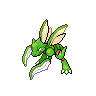

In [16]:
# Display an image in Jupyter notebook
from IPython.display import Image
# https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/123.png
display(Image( 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/shiny/123.png', width = 300))


In [17]:
# recreate your pokemon class here
import requests
class Pokemon():         #argument
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.image = None
        self.poke_api_call()
#       add poke_api_call to init
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            data = r.json()
        else:
            print(f"Please check the spelling of your pokemon and try again: {r.status_code}")
        self.name = data['name']
        self.types = [type_['type']['name'] for type_ in data['types']]
        self.abilities = [pokebility['ability']['name'] for pokebility in data ['abilities']]
        self.weight = data['weight']
        self.image = data['sprites']['front_default']
        print(f"{self.name}'s data has been updated")

    def display(self):
        display(Image(url=self.image))

    def __repr__(self):
        return f"You caught a {self.name}!"
        
    

In [18]:
scyther = Pokemon('scythe')
scyther.display()

Please check the spelling of your pokemon and try again: 404


UnboundLocalError: cannot access local variable 'data' where it is not associated with a value

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

Now let's evolve a few

In [11]:
import requests
# recreate your pokemon class here
class Pokemon():         #argument
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.image = None
        self.poke_api_call()
#       add poke_api_call to init
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            data = r.json()
        else:
            print(f"Please check the spelling of your pokemon and try again: {r.status_code}")
        self.name = data['name']
        self.types = [type_['type']['name'] for type_ in data['types']]
        self.abilities = [pokebility['ability']['name'] for pokebility in data ['abilities']]
        self.weight = data['weight']
        self.image = data['sprites']['front_default']
        print(f"{self.name}'s data has been updated")

    def display(self):
        display(Image(url=self.image))

    def __repr__(self):
        return f"You caught a {self.name}!"

In [12]:
## Evolver class should inherit pokemon class
from time import sleep
# Display an image in Jupyter notebook
from IPython.display import Image
class Evolver(Pokemon):
    def __inti__(self, name):
        super().__init__(name)
    def evolve(self):
#     API 
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}/")
        if r.status_code == 200:
            pokemon_species = r.json()
        else:
            print(f"Please check your pokemon's name and try again! {r.status_cide}")
            return

        r = requests.get(pokemon_species['evolution_chain']['url'])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain['chain']
        else:
            print(f'Please check that your pokemon can evolve and try again: {r.status_code}')
            return
    
        base_name = ev_chain['species']['name'] #charmander if it's the base pokemone
        evolution = ev_chain['evolves_to'][0]
        evolution_name = evolution['species']['name']

#      Evolution 1 
        if base_name == self.name:
            pass
#      Evolution 2 
        elif evolution_name == self.name:
            evolution_name == evolution['evolves_to'][0]['species']['name'] 
#      Evolution 3
        else: 
            print(f"You cannot evolve yourself {self.name} any further..")
            return

        print('.....')
        sleep(1)
        print(f"Your {self.name} is evolving?!?!?!?!")
        self.display()
        sleep(1)
        print('......')
        print(f"Congrats! Your {self.name} has evolved to......")
        self.name = evolution_name
        self.poke_api_call()
        print(f'{self.name.title()}!!!')
        self.display()
        

In [9]:
press_b = Evolver('kabuto')

kabuto's data has been updated


In [10]:
press_b.evolve()

.....
Your kabuto is evolving?!?!?!?!


......
Congrats! Your kabuto has evolved to......
kabutops's data has been updated
Kabutops!!!


#  Final Exercise: <br> <br>Create a Move_Tutor Class that in herits from the Pokemon parent class.

<p>This class should have a list attribute (move_list) that holds pokemon moves which should be populated with an api call to the PokeApi moves section  (just like we did with abilities and types in the Pokemon class example). Finally create a class method that teaches your pokemon up to 4 moves. This method should take in a user input to what move they would like to teach and do a membership inside the move_list. If the move exists inside the move_list the pokemon can learn that move and append to the final taught_moves list. </p> 



In [40]:
import requests
class Move_Tutor(Pokemon):
    def __init__(self):
        self.move_list = []
        self.taught_moves = []
        self.poke_api_call()

    def poke_api_call(self):
        r = request.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            data = r.json
        else:
            print(f"That's not a pokemon! Try again: {r.status_code}")
        self.name = data['name']    
        self.move_list = [pokemove['move']['name'] for pokemove in data ['move']]
        self.taught_moves =[pokemove['move']['name'] for pokemove in data ['move']]
        print(f"{self.name}'s data has been updated!")

    
        
    def teach_move(self):
        if not Move_Tutor.move_list: #now you're going to need another else. Remember that
            Move_Tutor.poke_api_call()
            pass

#      possible input to ask user what move would they like to teach?
        teach_this = input(f'What move would you like {self.name} to learn?:   ')
        if teach_this in Move_tutor.move_list:
# maybe an if else statements? to append the moves that are taught if .... < 4: print and append

            if len(self.taught_moves) < 4:
                print(f'{self.name} learned {teach_this}!') #refer back to the input^ now append
                self.taught_moves.append(teach_this)
            else:
                print(f'{self.name} already knows 4 moves. Cannot learn more')

        else:
            print(f'{teach_this} cannot learn this move.')
            

In [41]:
pikachu.teach_move()


AttributeError: 'Pokemon' object has no attribute 'teach_move'

In [42]:
pikachu.show_moves()

AttributeError: 'Pokemon' object has no attribute 'show_moves'